# Analyses of session dendogram clusters


In [1]:
prefix = '/home/ines/repositories/'
prefix = '/Users/ineslaranjeira/Documents/Repositories/'

In [2]:

""" 
IMPORTS
"""
import os
import autograd.numpy as np
import pickle
import seaborn as sns
import pandas as pd
from one.api import ONE
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go 

# --Machine learning and statistics
from scipy.stats import ttest_ind
from sklearn.metrics import f1_score
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import scikit_posthocs as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

one = ONE(mode='remote')

## Get data

In [3]:
# Full file path for dumping
file_path = os.path.join('/home/ines/repositories/representation_learning_variability/Exported figures/COSYNE25/')
file_path = os.path.join('/home/ines/repositories/representation_learning_variability/Exported figures/COSYNE/')

# DATA used for COSYNE: states_trial_type_14oct2024

In [4]:
# Load old trial clsuters to get ballistic trials
results_path = prefix + 'representation_learning_variability/Models/Sub-trial/4_analyses/'
trials_filename = str(results_path + 'cluster_per_trial01-09-2025')
old_trial_clusters = pd.read_parquet(trials_filename, engine='pyarrow')
# mouse_filename = str(results_path + 'cluster_per_mouse01-09-2025')
# old_mouse_clusters = pd.read_parquet(mouse_filename, engine='pyarrow')

In [5]:
# Load session clusters
results_path = prefix + 'representation_learning_variability/Models/Sub-trial/4_analyses/'

trials_filename = str(results_path + 'cluster_per_trial_part_info03-21-2025')
trial_clusters = pd.read_parquet(trials_filename, engine='pyarrow')

session_filename = str(results_path + 'cluster_per_session_dendogram05-15-2025')
session_filename = str(results_path + 'cluster_per_session_dendogram')
session_clusters = pd.read_parquet(session_filename, engine='pyarrow')

In [6]:
all_clusters = trial_clusters.merge(session_clusters, on=['mouse_name', 'session'])

## Merge trial info and mouse clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


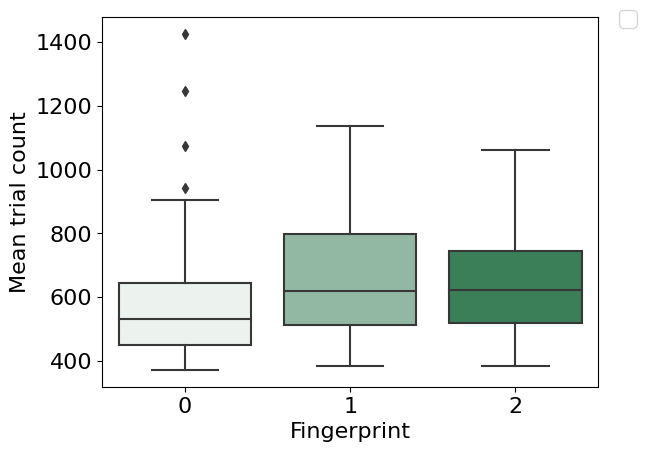

In [7]:
# part_trials_df = trial_clusters.merge(parts_clusters[['mouse_name', 'part_cluster']])
plt.rcParams.update({'font.size': 16})

new_df = pd.DataFrame(all_clusters.groupby(['mouse_name', 'session_cluster', 'sample'])[['trial_id']].count()).reset_index()
new_df = pd.DataFrame(all_clusters.groupby(['mouse_name', 'session_cluster', 'session'])[['trial_id']].count()).reset_index()
new_df['trial_id'] = new_df['trial_id']
# sns.violinplot(x='session_cluster', y='trial_id', data=new_df, palette=sns.light_palette("seagreen", 3, as_cmap=False))
sns.boxplot(x='session_cluster', y='trial_id', data=new_df, palette=sns.light_palette("seagreen", 3, as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.ylim([0, 1])
plt.title('')
plt.ylabel('Mean trial count')
plt.xlabel('Fingerprint')
# plt.savefig(file_path+'reaction_mouse.svg', format="svg")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


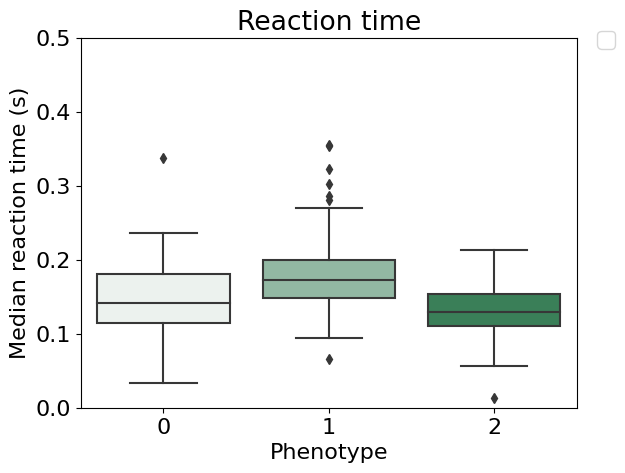

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


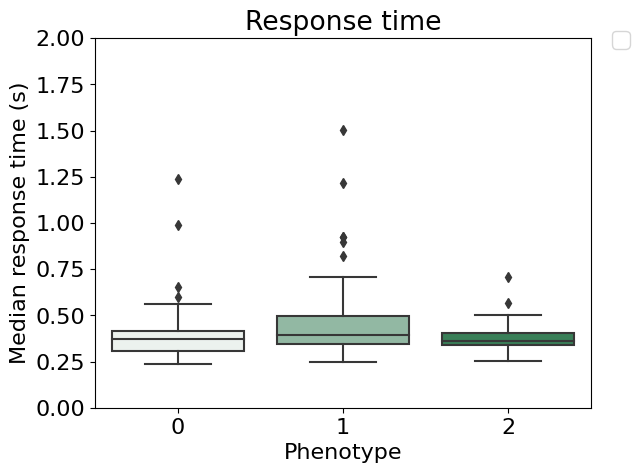

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


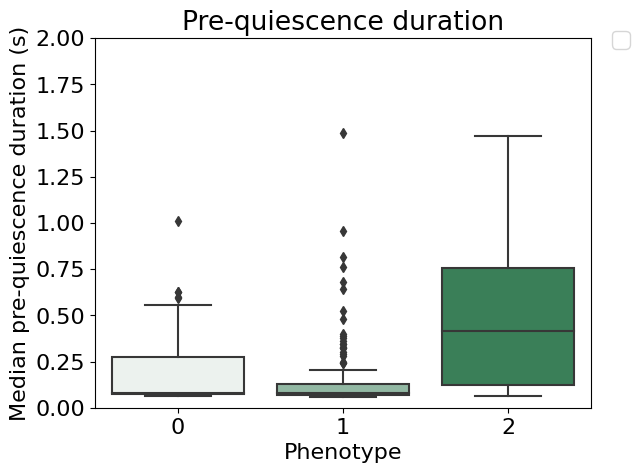

In [116]:
# part_trials_df = trial_clusters.merge(parts_clusters[['mouse_name', 'part_cluster']])
plt.rcParams.update({'font.size': 16})

new_df = pd.DataFrame(all_clusters.groupby(['mouse_name', 'session_cluster', 'session'])[['reaction', 'response', 
                                                                                          'elongation']].median()).reset_index()
# sns.violinplot(x='session_cluster', y='reaction', data=new_df, palette=sns.light_palette("seagreen", 3, as_cmap=False))
sns.boxplot(x='session_cluster', y='reaction', data=new_df, palette=sns.light_palette("seagreen", 3, as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylim([0, .5])
plt.title('Reaction time')
plt.ylabel('Median reaction time (s)')
plt.xlabel('Phenotype')
# plt.savefig(file_path+'reaction_mouse.svg', format="svg")

plt.show()

# sns.violinplot(x='session_cluster', y='response', data=new_df, palette=sns.light_palette("seagreen", 3, as_cmap=False))
sns.boxplot(x='session_cluster', y='response', data=new_df, palette=sns.light_palette("seagreen", 3, as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Response time')
plt.ylabel('Median response time (s)')
plt.ylim([0, 2])
# plt.savefig(file_path+'response_mouse.svg', format="svg")

plt.xlabel('Phenotype')
plt.show()

# sns.violinplot(x='session_cluster', y='elongation', data=new_df, palette=sns.light_palette("seagreen", 3, as_cmap=False))
sns.boxplot(x='session_cluster', y='elongation', data=new_df, palette=sns.light_palette("seagreen", 3, as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Pre-quiescence duration')
plt.ylabel('Median pre-quiescence duration (s)')
# plt.savefig(file_path+'elongation_mouse.svg', format="svg")
plt.ylim([0, 2])
plt.xlabel('Phenotype')
plt.show()

                       sum_sq     df         F   PR(>F)
session_cluster  1.696667e+05    1.0  4.506043  0.03493
Residual         8.020122e+06  213.0       NaN      NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1   79.521  0.022   9.2982 149.7438   True
     0      2  67.1388  0.193  -23.969 158.2467  False
     1      2 -12.3822 0.9375 -97.7753  73.0109  False
------------------------------------------------------


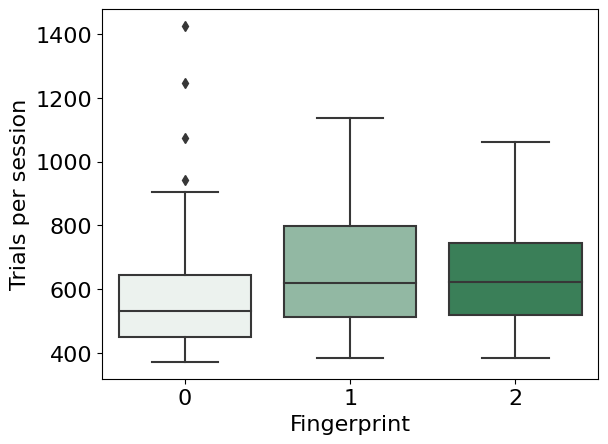

P-value for KW: 0.004
          0         1         2
0  1.000000  0.005499  0.039593
1  0.005499  1.000000  1.000000
2  0.039593  1.000000  1.000000


In [ ]:
var_1 = 'trial_id ~ session_cluster'
var = 'trial_id'
# var = 'elongation'
# var_1 = 'elongation ~ part_cluster'
# Define the model using ordinary least squares (OLS) and fit it
data = new_df.dropna()
# data = df.loc[df['mouse_name'].isin(filter_mice)].dropna()
# data = pd.DataFrame(df.groupby(['mouse_name', 'part_cluster'])[var].mean()).reset_index().dropna()

model = ols(var_1, data=data).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

print(anova_table)

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=data[var], groups=data['session_cluster'], alpha=0.05)

print(tukey)
plt.rcParams.update({'font.size': 16})
# sns.violinplot(x='session_cluster', y=var, data=data, palette=sns.light_palette("seagreen", 3, as_cmap=False))
sns.boxplot(x='session_cluster', y=var, data=data, palette=sns.light_palette("seagreen", 3, as_cmap=False))
# sns.scatterplot(x='part_cluster', y=var, data=data, color='black')
plt.xticks([0, 1, 2], [0, 1, 2])
# plt.ylim([0, 1])
plt.xlabel('Fingerprint')
plt.ylabel('Trials per session')
group_1 = new_df.loc[new_df['session_cluster']==0, var]
group_2 = new_df.loc[new_df['session_cluster']==1, var]
group_3 = new_df.loc[new_df['session_cluster']==2, var]


stat, p_value = stats.kruskal(group_1, group_2, group_3)
# stat, p_value = stats.kruskal(group_1, group_2)

print(f"P-value for KW: {p_value:.3f}")

posthoc = sp.posthoc_dunn(new_df.dropna(), val_col=var, group_col='session_cluster', p_adjust='bonferroni')
print(posthoc)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


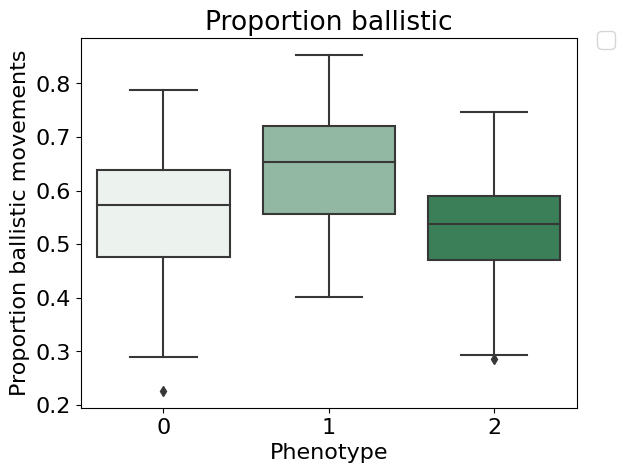

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


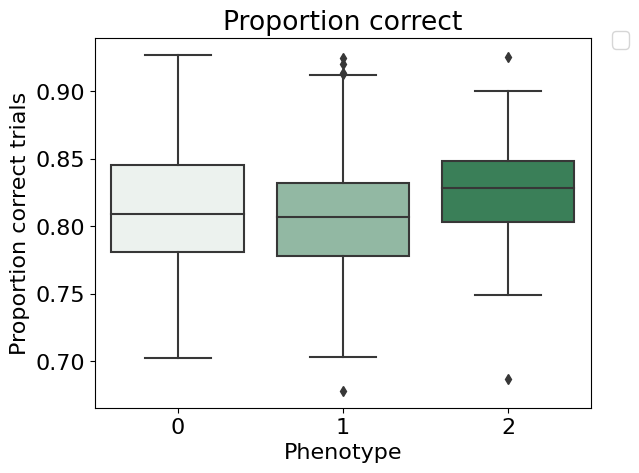

In [8]:

new_df = pd.DataFrame(all_clusters.groupby(['mouse_name', 'session_cluster', 'session'])[['feedback', 'ballistic',
                                                                                           'contrast', 'block']].mean()).reset_index()

# sns.violinplot(x='session_cluster', y='ballistic', data=new_df, palette=sns.light_palette("seagreen", 3, as_cmap=False))
sns.boxplot(x='session_cluster', y='ballistic', data=new_df, palette=sns.light_palette("seagreen", 3, as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Proportion ballistic')
plt.ylabel('Proportion ballistic movements')
# plt.savefig(file_path+'ballistic_mouse.svg', format="svg")

plt.xlabel('Phenotype')
plt.show()

# sns.violinplot(x='session_cluster', y='feedback', data=new_df, palette=sns.light_palette("seagreen", 3, as_cmap=False))
sns.boxplot(x='session_cluster', y='feedback', data=new_df, palette=sns.light_palette("seagreen", 3, as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.ylim([.65,1])
plt.title('Proportion correct')
plt.ylabel('Proportion correct trials')
# plt.savefig(file_path+'correct_mouse.svg', format="svg")

plt.xlabel('Phenotype')
# plt.ylim([.5, 1])
plt.show()

# sns.barplot(x='part_cluster', y='contrast', data=new_df, palette=sns.cubehelix_palette(3,as_cmap=False))
# plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.title('Contrast')
# plt.ylabel('Contrast')
# # plt.savefig(file_path+'correct_mouse.svg', format="svg")

# plt.xlabel('Cluster')
# plt.ylim([.5, 1])
# plt.show()

# sns.violinplot(x='part_cluster', y='block', data=new_df, palette=sns.cubehelix_palette(3,as_cmap=False))
# plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.title('Block probability')
# plt.ylabel('lock probability')
# # plt.savefig(file_path+'ballistic_mouse.svg', format="svg")
# plt.xlabel('Cluster')
# plt.show()



                   sum_sq     df         F   PR(>F)
session_cluster  0.000634    1.0  0.044266  0.83356
Residual         3.048510  213.0       NaN      NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0828    0.0  0.0426   0.123   True
     0      2  -0.0226 0.5635 -0.0747  0.0296  False
     1      2  -0.1054    0.0 -0.1543 -0.0565   True
----------------------------------------------------


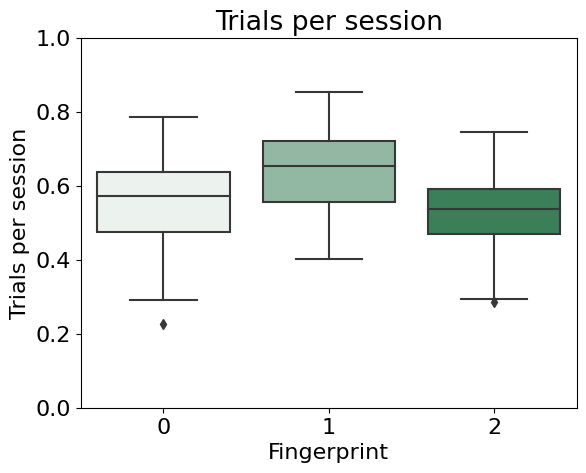

P-value for KW: 0.000
          0         1         2
0  1.000000  0.000040  0.765998
1  0.000040  1.000000  0.000005
2  0.765998  0.000005  1.000000


In [10]:
var_1 = 'ballistic ~ session_cluster'
var = 'ballistic'
# var = 'elongation'
# var_1 = 'elongation ~ part_cluster'
# Define the model using ordinary least squares (OLS) and fit it
data = new_df.dropna()
# data = df.loc[df['mouse_name'].isin(filter_mice)].dropna()
# data = pd.DataFrame(df.groupby(['mouse_name', 'part_cluster'])[var].mean()).reset_index().dropna()

model = ols(var_1, data=data).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

print(anova_table)

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=data[var], groups=data['session_cluster'], alpha=0.05)

print(tukey)
plt.rcParams.update({'font.size': 16})
# sns.violinplot(x='session_cluster', y=var, data=data, palette=sns.light_palette("seagreen", 3, as_cmap=False))
sns.boxplot(x='session_cluster', y=var, data=data, palette=sns.light_palette("seagreen", 3, as_cmap=False))
# sns.scatterplot(x='part_cluster', y=var, data=data, color='black')
plt.xticks([0, 1, 2], [0, 1, 2])
plt.ylim([0, 1])
plt.xlabel('Fingerprint')
plt.ylabel('Trials per session')
plt.title('Trials per session')
# plt.ylabel('Training time (sessions)')
# plt.savefig(file_path+'training_time.svg', format="svg")

plt.show()

group_1 = new_df.loc[new_df['session_cluster']==0, var]
group_2 = new_df.loc[new_df['session_cluster']==1, var]
group_3 = new_df.loc[new_df['session_cluster']==2, var]


stat, p_value = stats.kruskal(group_1, group_2, group_3)
# stat, p_value = stats.kruskal(group_1, group_2)

print(f"P-value for KW: {p_value:.3f}")

posthoc = sp.posthoc_dunn(new_df.dropna(), val_col=var, group_col='session_cluster', p_adjust='bonferroni')
print(posthoc)

## Plot states per cluster

In [117]:
from matplotlib.colors import LinearSegmentedColormap

# Load color palette
colors = sns.cubehelix_palette(3,as_cmap=False)
colors = sns.color_palette("viridis", 3)

# Function to create a colormap from a base color (white to color)
def create_shaded_cmap(base_color, name='custom_cmap'):
    cdict = {
        'red':   [[0.0, 1.0, 1.0], [1.0, base_color[0], base_color[0]]],
        'green': [[0.0, 1.0, 1.0], [1.0, base_color[1], base_color[1]]],
        'blue':  [[0.0, 1.0, 1.0], [1.0, base_color[2], base_color[2]]]
    }
    return LinearSegmentedColormap(name, cdict)

In [118]:
wheel_mapping = {0:0, 1:1, 2:2, 3:3,
                 4:0, 5:1, 6:2, 7:3,
                 8:0, 9:1, 10:2, 11:3,
                 12:0, 13:1, 14:2, 15:3}
whisker_mapping = {0:0, 1:0, 2:0, 3:0,
                 4:1, 5:1, 6:1, 7:1,
                 8:0, 9:0, 10:0, 11:0,
                 12:1, 13:1, 14:1, 15:1}
lick_mapping = {0:0, 1:0, 2:0, 3:0,
                 4:0, 5:0, 6:0, 7:0,
                 8:1, 9:1, 10:1, 11:1,
                 12:1, 13:1, 14:1, 15:1}
replace_wheel = np.vectorize(wheel_mapping.get)
# wheel_states = replace_wheel(use_sequences)
replace_whisker = np.vectorize(whisker_mapping.get)
# whisker_states = replace_whisker(use_sequences)
replace_lick = np.vectorize(lick_mapping.get)
# lick_states = replace_lick(use_sequences)

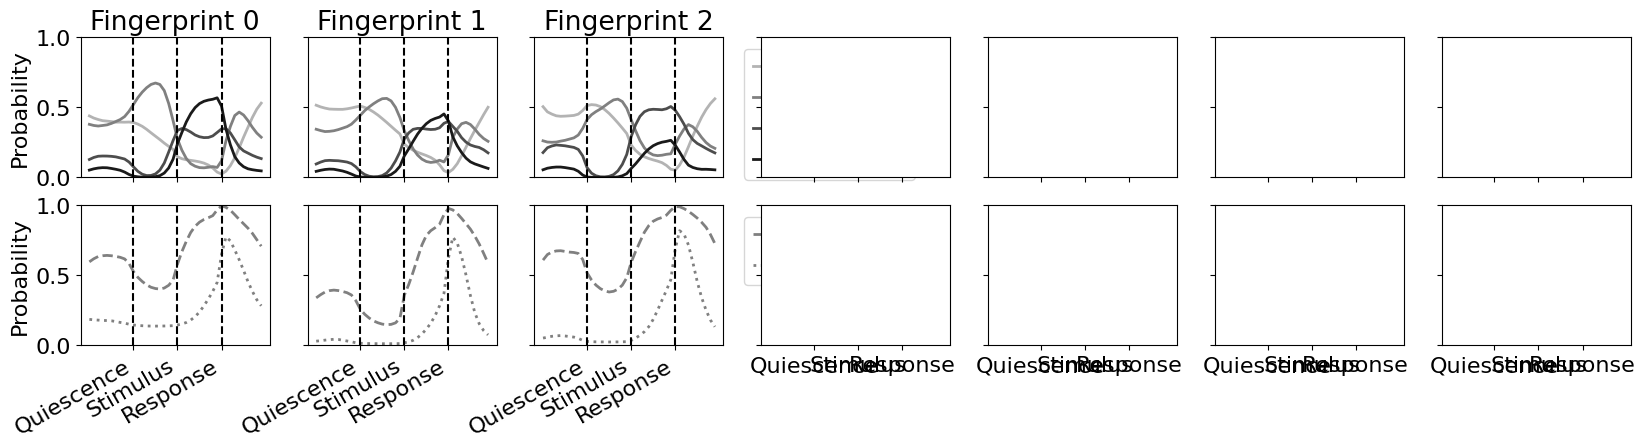

In [119]:
epoch_to_analyse = ['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']

fig, axs = plt.subplots(2, 7, sharex=True, sharey=True, figsize=(20, 4)) # len(parts_clusters['part_cluster'].unique())
plt.rcParams.update({'font.size': 16})

for c, cluster in enumerate([0, 1, 2]):
    cluster_data = all_clusters.loc[all_clusters['session_cluster']==cluster]
    sequences_choice = np.vstack(cluster_data[epoch_to_analyse].apply(lambda row: np.hstack(row), axis=1))  # Transpose to get the right shape
    use_sequences = sequences_choice[~np.isnan(sequences_choice).any(axis=1)]
    
    replace_whisker = np.vectorize(whisker_mapping.get)
    whisker_states = replace_whisker(use_sequences)
    replace_wheel = np.vectorize(wheel_mapping.get)
    wheel_states = replace_wheel(use_sequences)    
    replace_lick = np.vectorize(lick_mapping.get)
    lick_states = replace_lick(use_sequences)
    
    whisker_count = np.zeros((1, 40))
    lick_count = np.zeros((1, 40))
    wheel_count = np.zeros((4, 40))

    for b, bin in enumerate(range(40)):
        # counts, bins = np.histogram(use_sequences[:, b], range=(0,15), bins=16)
        whisker_count[0, b] = np.sum(whisker_states[:, b]==1)/len(whisker_states[:, b])
        lick_count[0, b] = np.sum(lick_states[:, b]==1)/len(lick_states[:, b])
        wheel_count[0, b] = np.sum(wheel_states[:, b]==1)/len(wheel_states[:, b])
        wheel_count[1, b] = np.sum(wheel_states[:, b]==2)/len(wheel_states[:, b])
        wheel_count[2, b] = np.sum(wheel_states[:, b]==3)/len(wheel_states[:, b])
        wheel_count[3, b] = np.sum(wheel_states[:, b]==0)/len(wheel_states[:, b])
    
    all_stacked = np.vstack([wheel_count, whisker_count, lick_count])

    num_lines = 4
    colors = [str(1- 0.6 * (i / (num_lines - 1))-.3) for i in range(num_lines)]  # Light to dark gray
    axs[0, c].set_prop_cycle(color=colors)
    axs[0, c].plot(all_stacked[0:4, :].T, label=['Wheel 0', 'Wheel 1', 'Wheel 2', 'Wheel 3'], linewidth=2)
    axs[1, c].plot(all_stacked[4:5, :].T, label='Whisking', color='grey', linewidth=2, linestyle='--')
    axs[1, c].plot(all_stacked[5:6, :].T, label='Licking', color='grey', linewidth=2, linestyle=':')

    axs[0, c].axvline(x=10, color='k', linestyle='--')
    axs[0, c].axvline(x=20, color='k', linestyle='--')
    axs[0, c].axvline(x=30, color='k', linestyle='--')
    axs[1, c].axvline(x=10, color='k', linestyle='--')
    axs[1, c].axvline(x=20, color='k', linestyle='--')
    axs[1, c].axvline(x=30, color='k', linestyle='--')
    # axs[2, c].axvline(x=10, color='k', linestyle='--')
    # axs[2, c].axvline(x=20, color='k', linestyle='--')
    # axs[2, c].axvline(x=30, color='k', linestyle='--')
    axs[0, c].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    axs[1, c].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    # axs[2, c].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    axs[0, c].set_title('Fingerprint ' +str(cluster))
    axs[0, c].set_ylim([0, 0.7])
    axs[1, c].set_ylim([0, 1])
    # axs[2, c].set_ylim([0, 0.8])

axs[0, 0].set_ylabel('Probability')
axs[1, 0].set_ylabel('Probability')
# axs[2, 0].set_ylabel('Probability')

axs[0, 2].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
axs[1, 2].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# axs[2, 2].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.tight_layout()
# plt.savefig(file_path+'phenotype_states.svg', format="svg")


## Cluster assignment entropy

In [33]:
# Load trial clsuters
results_path = prefix + 'representation_learning_variability/Models/Sub-trial/4_analyses/'
filename = str(results_path + 'entropy03-21-2025')
entropy = pd.read_parquet(filename, engine='pyarrow')

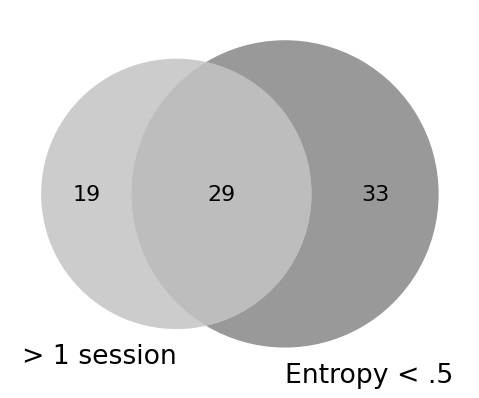

In [34]:
from matplotlib_venn import venn2

set1 = set(list(entropy.loc[(entropy['session_len']>1) & (entropy['variable']=='True'), 'mouse_name']))
set2 = set(list(entropy.loc[(entropy['value']<.3), 'mouse_name']))

venn2([set1, set2], ('> 1 session', 'Entropy < .5'), set_colors=("grey", "black"))

plt.show()

/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Text(29.222222222222214, 0.5, 'Mouse cluster entropy')

/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning:

8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



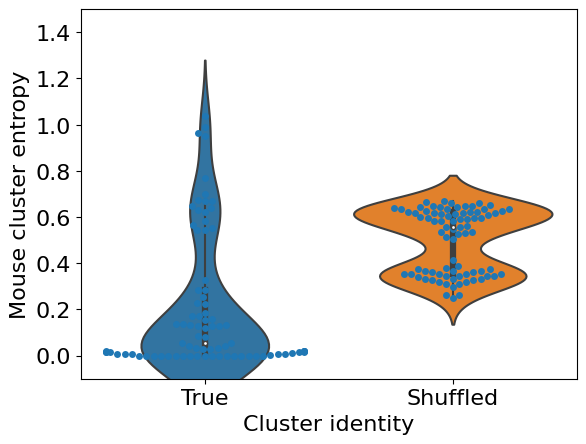

In [28]:
sns.swarmplot(x='variable', y='value', data=entropy)
sns.violinplot(x='variable', y='value', data=entropy)
plt.xlabel('Cluster identity')
plt.ylim([-.1, 1.5])
plt.ylabel('Mouse cluster entropy')

## Load learning data

In [23]:
# new_df = pd.DataFrame(part_trials_df.groupby(['mouse_name', 'part_cluster', 'sample'])[['feedback', 'ballistic',
#                                                                                            'contrast', 'block']].mean()).reset_index()
new_df = pd.DataFrame(part_trials_df.groupby(['mouse_name', 'part_cluster', 'sample'])[['feedback',
                                                                                           'contrast', 'block']].mean()).reset_index()
# new_df = pd.DataFrame(part_trials_df.groupby(['mouse_name', 'part_cluster', 'sample'])[['reaction', 'response', 
#                                                                                           'elongation']].median()).reset_index()

In [63]:
data_path = prefix + 'representation_learning_variability/DATA/'
learning_df = pd.read_csv(data_path+'learning_private_one.csv')  
learning_times = learning_df[['subject_nickname', 'training_time']].drop_duplicates()
learning_times = learning_times.rename(columns={"subject_nickname": "mouse_name"}).reset_index()
df = new_df.merge(learning_times, on='mouse_name')

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_60396/2576267361.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  learning_df = pd.read_csv(data_path+'learning_private_one.csv')


In [64]:
data_path = prefix + 'representation_learning_variability/DATA/'
learning_df = pd.read_parquet(data_path+'training_time_03-21-2025', engine='pyarrow')
learning_times_new = learning_df.rename(columns={"subject_nickname": "mouse_name"}).reset_index()

In [65]:
a = df[['mouse_name', 'training_time']].merge(learning_times_new, on='mouse_name', how='outer')
b = a.loc[a['training_time_x'].isna()]
b = b.rename(columns={"training_time_y": "training_time"}).reset_index()

full_learning = pd.concat([learning_times[['mouse_name', 'training_time']], b[['mouse_name', 'training_time']]]).reset_index()

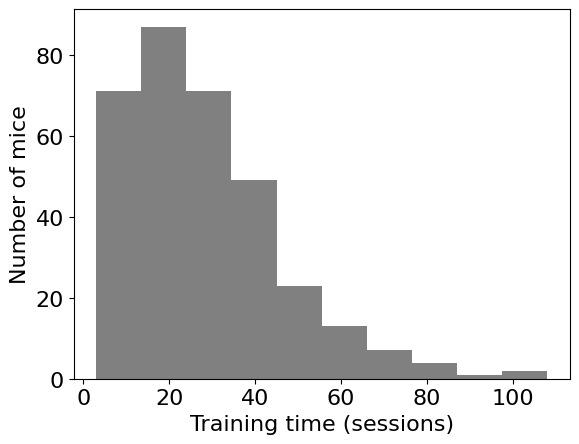

In [66]:
plt.rcParams.update({'font.size': 16})
plt.hist(full_learning['training_time'], color='grey')
plt.xlabel('Training time (sessions)')
plt.ylabel('Number of mice')
save_path = '/home/ines/repositories/representation_learning_variability/Exported figures/COSYNE/'
# plt.savefig(save_path+'histogram_training_time.svg', format="svg")

In [28]:
filter_mice = entropy.loc[(entropy['variable']=='True') & (entropy['session_len']>1) & (entropy['value']<.5), 'mouse_name']

## Correlation entropy and performance

In [74]:
perf = pd.DataFrame(part_trials_df.groupby(['mouse_name'])[['feedback','contrast', 'block']].mean()).reset_index()

(0.12415207718611992, 0.400495182603326)

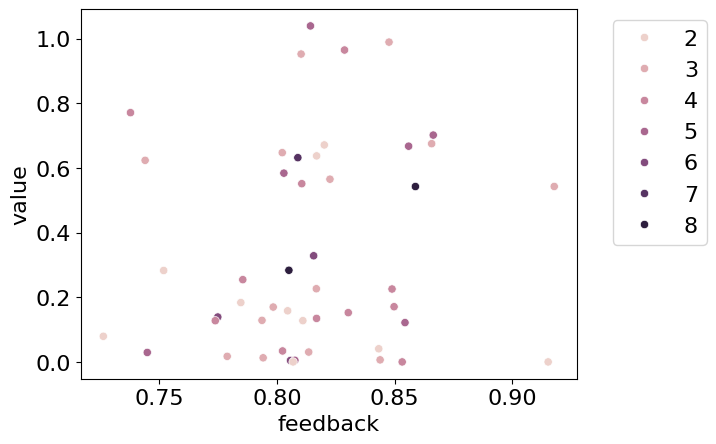

In [92]:
mouse_perf = pd.DataFrame(perf.groupby(['mouse_name'])['feedback'].mean()).reset_index()
perf_ent = mouse_perf.merge(entropy, on=['mouse_name'])

use_data = perf_ent.loc[(perf_ent['variable']=='True') & (perf_ent['session_len']>1)]
sns.scatterplot(x='feedback', y='value', data=use_data, hue='session_len')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
res = stats.pearsonr(use_data['value'], use_data['feedback'])
res

## Correlate entropy and training time

In [60]:
use_ent = entropy.loc[(entropy['variable']=='True') & (entropy['session_len']>1)]

In [61]:
ines = use_ent.merge(full_learning, on='mouse_name')

(0.21008420490705665, 0.15180366166946127)

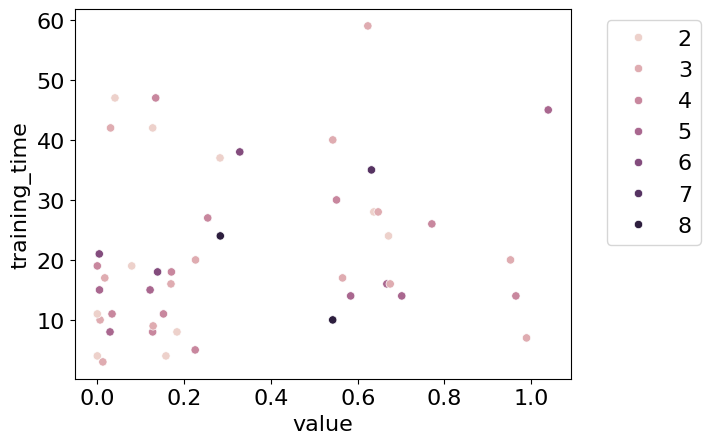

In [62]:
sns.scatterplot(x='value', y='training_time', data=ines, hue='session_len')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
from scipy import stats

res = stats.pearsonr(ines['value'], ines['training_time'])
res

In [32]:
ines['ent'] = ines['value']
ines.loc[ines['value']<=.5, 'ent'] = 0
ines.loc[ines['value']>.5, 'ent'] = 1

               sum_sq    df         F    PR(>F)
ent        337.568056   1.0  1.899293  0.174825
Residual  8175.744444  46.0       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   0.0    1.0   5.4778 0.1748 -2.523 13.4785  False
---------------------------------------------------
P-value for KW: 0.141
          0.0       1.0
0.0  1.000000  0.141428
1.0  0.141428  1.000000


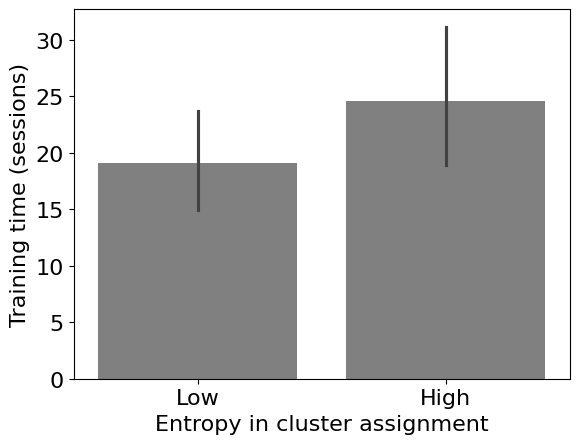

In [33]:
df = ines.loc[ines['session_len']>1]
var_1 = 'training_time ~ ent'
var = 'training_time'
# var = 'elongation'
# var_1 = 'elongation ~ part_cluster'
# Define the model using ordinary least squares (OLS) and fit it
data = df.dropna()

model = ols(var_1, data=data).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

print(anova_table)

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=data[var], groups=data['ent'], alpha=0.05)

print(tukey)
plt.rcParams.update({'font.size': 16})
# sns.scatterplot(x='ent', y=var, data=data, color='black')
sns.barplot(x='ent', y='training_time', data=data, color='grey')
plt.xticks([0, 1], ['Low', 'High'])
plt.xlabel('Entropy in cluster assignment')
plt.ylabel('Training time (sessions)')
# # plt.savefig(file_path+'training_time.svg', format="svg")

# plt.show()

group_1 = df.loc[df['ent']==0, var]
group_2 = df.loc[df['ent']==1, var]

stat, p_value = stats.kruskal(group_1, group_2)
# stat, p_value = stats.kruskal(group_1, group_2)

print(f"P-value for KW: {p_value:.3f}")

posthoc = sp.posthoc_dunn(df.dropna(), val_col=var, group_col='ent', p_adjust='bonferroni')
print(posthoc)


## Training time and fingerprints

                       sum_sq     df         F    PR(>F)
session_cluster     14.277922    1.0  0.078076  0.780193
Residual         38951.880217  213.0       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   1.5577 0.7357 -3.3634 6.4788  False
     0      2   0.3322 0.9917 -6.0524 6.7169  False
     1      2  -1.2254 0.8793 -7.2096 4.7587  False
---------------------------------------------------


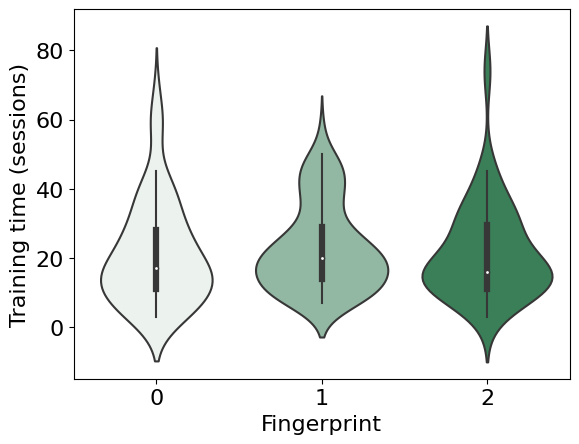

P-value for KW: 0.411
          0         1    2
0  1.000000  0.555335  1.0
1  0.555335  1.000000  1.0
2  1.000000  1.000000  1.0


In [89]:
df = new_df.merge(full_learning, on='mouse_name')

var_1 = 'training_time ~ session_cluster'
var = 'training_time'
# var = 'elongation'
# var_1 = 'elongation ~ part_cluster'
# Define the model using ordinary least squares (OLS) and fit it
data = df.dropna()
# data = df.loc[df['mouse_name'].isin(filter_mice)].dropna()
# data = pd.DataFrame(df.groupby(['mouse_name', 'part_cluster'])[var].mean()).reset_index().dropna()

model = ols(var_1, data=data).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

print(anova_table)

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=data[var], groups=data['session_cluster'], alpha=0.05)

print(tukey)
plt.rcParams.update({'font.size': 16})
sns.violinplot(x='session_cluster', y=var, data=data, palette=sns.light_palette("seagreen", 3, as_cmap=False))
# sns.scatterplot(x='part_cluster', y=var, data=data, color='black')
plt.xticks([0, 1, 2], [0, 1, 2])
# plt.ylim([0, 80])
plt.xlabel('Fingerprint')
plt.ylabel('Proportion correct')
plt.ylabel('Training time (sessions)')
# plt.savefig(file_path+'training_time.svg', format="svg")

plt.show()

group_1 = df.loc[df['session_cluster']==0, var]
group_2 = df.loc[df['session_cluster']==1, var]
group_3 = df.loc[df['session_cluster']==2, var]


stat, p_value = stats.kruskal(group_1, group_2, group_3)
# stat, p_value = stats.kruskal(group_1, group_2)

print(f"P-value for KW: {p_value:.3f}")

posthoc = sp.posthoc_dunn(df.dropna(), val_col=var, group_col='session_cluster', p_adjust='bonferroni')
print(posthoc)

In [39]:
df = new_df.merge(full_learning, on='mouse_name')

var_1 = 'training_time ~ part_cluster'
var = 'training_time'
# var = 'elongation'
# var_1 = 'elongation ~ part_cluster'
# Define the model using ordinary least squares (OLS) and fit it
data = df.dropna()
# data = df.loc[df['mouse_name'].isin(filter_mice)].dropna()
# data = pd.DataFrame(df.groupby(['mouse_name', 'part_cluster'])[var].mean()).reset_index().dropna()

model = ols(var_1, data=data).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

print(anova_table)

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=data[var], groups=data['part_cluster'], alpha=0.05)

print(tukey)
plt.rcParams.update({'font.size': 16})
sns.violinplot(x='part_cluster', y=var, data=data, palette=sns.light_palette("seagreen", 3, as_cmap=False))
# sns.scatterplot(x='part_cluster', y=var, data=data, color='black')
plt.xticks([0, 1, 2], [0, 1, 2])
# plt.ylim([0, 80])
plt.xlabel('Fingerprint')
plt.ylabel('Proportion correct')
plt.ylabel('Training time (sessions)')
# plt.savefig(file_path+'training_time.svg', format="svg")

plt.show()

group_1 = df.loc[df['part_cluster']==0, var]
group_2 = df.loc[df['part_cluster']==1, var]
group_3 = df.loc[df['part_cluster']==2, var]


stat, p_value = stats.kruskal(group_1, group_2, group_3)
# stat, p_value = stats.kruskal(group_1, group_2)

print(f"P-value for KW: {p_value:.3f}")

posthoc = sp.posthoc_dunn(df.dropna(), val_col=var, group_col='part_cluster', p_adjust='bonferroni')
print(posthoc)


PatsyError: Error evaluating factor: NameError: name 'part_cluster' is not defined
    training_time ~ part_cluster
                    ^^^^^^^^^^^^

# Analyses per quartile

In [35]:
learning_times = full_learning.copy()
quartiles = learning_times['training_time'].quantile(q=[0.25, 0.5, 0.75])
# quartiles = learning_times['training_time'].quantile(q=[0.33, 0.66])

In [36]:
learning_times['quartile'] = learning_times['training_time']*np.nan
learning_times.loc[learning_times['training_time']<=quartiles[0.25], 'quartile']= 1
learning_times.loc[(learning_times['training_time']>quartiles[0.25]) & (learning_times['training_time']<=quartiles[0.50]), 'quartile']= 2
learning_times.loc[(learning_times['training_time']>quartiles[0.50]) & (learning_times['training_time']<=quartiles[0.75]), 'quartile']= 3
learning_times.loc[learning_times['training_time']>quartiles[0.75], 'quartile']= 4

In [10]:
learning_times['quartile'] = learning_times['training_time']*np.nan
learning_times.loc[learning_times['training_time']<=quartiles[0.33], 'quartile']= 1
learning_times.loc[(learning_times['training_time']>quartiles[0.33]) & (learning_times['training_time']<=quartiles[0.66]), 'quartile']= 2
learning_times.loc[learning_times['training_time']>quartiles[0.66], 'quartile']= 3

KeyError: 0.33

In [37]:
df = new_df.merge(learning_times[['mouse_name', 'training_time', 'quartile']], on='mouse_name')

In [39]:
sns.violinplot(x='quartile', y='reaction', data=df)
plt.show()
sns.barplot(x='quartile', y='reaction', data=df)
plt.show()
sns.violinplot(x='quartile', y='response', data=df)
plt.show()
sns.barplot(x='quartile', y='response', data=df)
plt.show()
sns.violinplot(x='quartile', y='elongation', data=df)
plt.show()
sns.barplot(x='quartile', y='elongation', data=df)
plt.show()


ValueError: Could not interpret input 'reaction'

### Plot state use per quartile

In [ ]:
# data = df.loc[df['mouse_name'].isin(filter_mice)].dropna()


In [40]:
part_trials_df = parts_clusters.merge(trial_clusters, on=['mouse_name', 'sample', 'cluster'])

In [50]:
# use_states = parts_clusters.merge(learning_times[['mouse_name',  'quartile']], on='mouse_name')
use_parts_trials = part_trials_df.merge(learning_times[['mouse_name',  'quartile']], on='mouse_name')
# use_parts_trials = use_parts_trials.loc[use_parts_trials['mouse_name'].isin(filter_mice)].dropna()

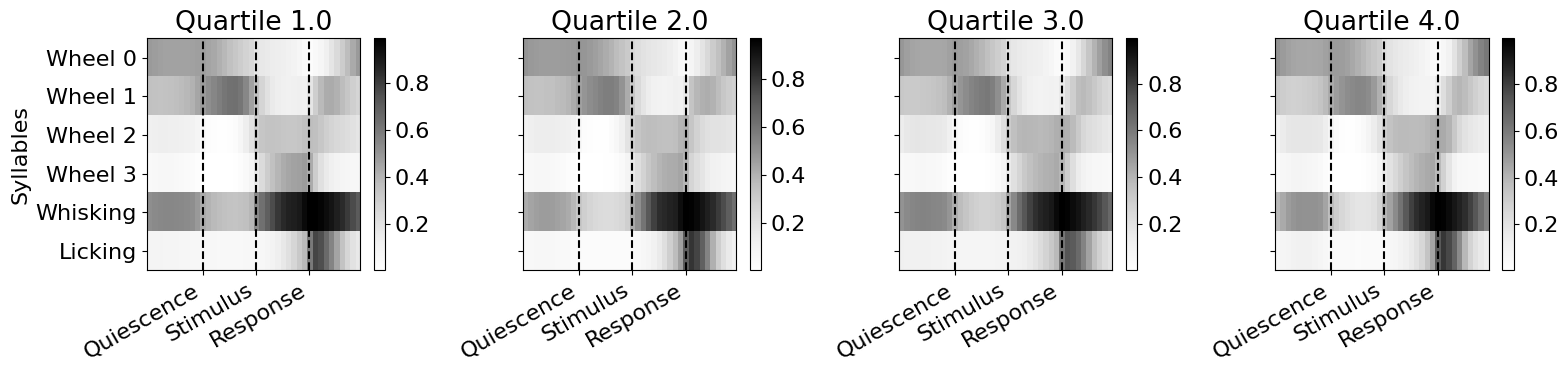

In [51]:
wheel_mapping = {0:0, 1:1, 2:2, 3:3,
                 4:0, 5:1, 6:2, 7:3,
                 8:0, 9:1, 10:2, 11:3,
                 12:0, 13:1, 14:2, 15:3}
whisker_mapping = {0:0, 1:0, 2:0, 3:0,
                 4:1, 5:1, 6:1, 7:1,
                 8:0, 9:0, 10:0, 11:0,
                 12:1, 13:1, 14:1, 15:1}
lick_mapping = {0:0, 1:0, 2:0, 3:0,
                 4:0, 5:0, 6:0, 7:0,
                 8:1, 9:1, 10:1, 11:1,
                 12:1, 13:1, 14:1, 15:1}
replace_wheel = np.vectorize(wheel_mapping.get)
# wheel_states = replace_wheel(use_sequences)
replace_whisker = np.vectorize(whisker_mapping.get)
# whisker_states = replace_whisker(use_sequences)
replace_lick = np.vectorize(lick_mapping.get)
# lick_states = replace_lick(use_sequences)
epoch_to_analyse = ['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']

color = sns.color_palette("Set2", 7)
fig, axs = plt.subplots(1, len(use_states['quartile'].unique()), sharex=True, sharey=True, figsize=(16, 4))

for q, quartile in enumerate([1., 2., 3., 4.]):
    cluster_data = use_parts_trials.loc[use_parts_trials['quartile']==quartile]
    sequences_choice = np.vstack(cluster_data[epoch_to_analyse].apply(lambda row: np.hstack(row), axis=1))  # Transpose to get the right shape
    use_sequences = sequences_choice[~np.isnan(sequences_choice).any(axis=1)]
    
    replace_whisker = np.vectorize(whisker_mapping.get)
    whisker_states = replace_whisker(use_sequences)
    replace_wheel = np.vectorize(wheel_mapping.get)
    wheel_states = replace_wheel(use_sequences)    
    replace_lick = np.vectorize(lick_mapping.get)
    lick_states = replace_lick(use_sequences)
    
    whisker_count = np.zeros((1, 40))
    lick_count = np.zeros((1, 40))
    wheel_count = np.zeros((4, 40))

    for b, bin in enumerate(range(40)):
        # counts, bins = np.histogram(use_sequences[:, b], range=(0,15), bins=16)
        whisker_count[0, b] = np.sum(whisker_states[:, b]==1)/len(whisker_states[:, b])
        lick_count[0, b] = np.sum(lick_states[:, b]==1)/len(lick_states[:, b])
        wheel_count[0, b] = np.sum(wheel_states[:, b]==1)/len(wheel_states[:, b])
        wheel_count[1, b] = np.sum(wheel_states[:, b]==2)/len(wheel_states[:, b])
        wheel_count[2, b] = np.sum(wheel_states[:, b]==3)/len(wheel_states[:, b])
        wheel_count[3, b] = np.sum(wheel_states[:, b]==0)/len(wheel_states[:, b])
    
    all_stacked = np.vstack([wheel_count, whisker_count, lick_count])
    # all_stacked = np.vstack([wheel_count])

    # cmap_value_1 = create_shaded_cmap(colors[q], name='cmap_value_1')
    # image = axs[c].imshow(all_stacked, cmap=cmap_value_1, aspect='auto')
    image = axs[q].imshow(all_stacked, cmap='Greys', aspect='auto')
    fig.colorbar(image, ax=axs[q], location='right', anchor=(0, 0.3))
    axs[q].set_yticks(np.arange(0, 6, 1), ['Wheel 0', 'Wheel 1', 'Wheel 2', 'Wheel 3', 'Whisking', 'Licking'])
    # axs[c].set_yticks(np.arange(0, 4, 1), ['Wheel 0', 'Wheel 1', 'Wheel 2', 'Wheel 3'])
    axs[q].axvline(x=10, color='k', linestyle='--')
    axs[q].axvline(x=20, color='k', linestyle='--')
    axs[q].axvline(x=30, color='k', linestyle='--')

    axs[q].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    # axs[c].set_xlabel('Time in epoch')
    axs[q].set_title('Quartile ' +str(quartile))
axs[0].set_ylabel('Syllables')
plt.tight_layout()
plt.show()

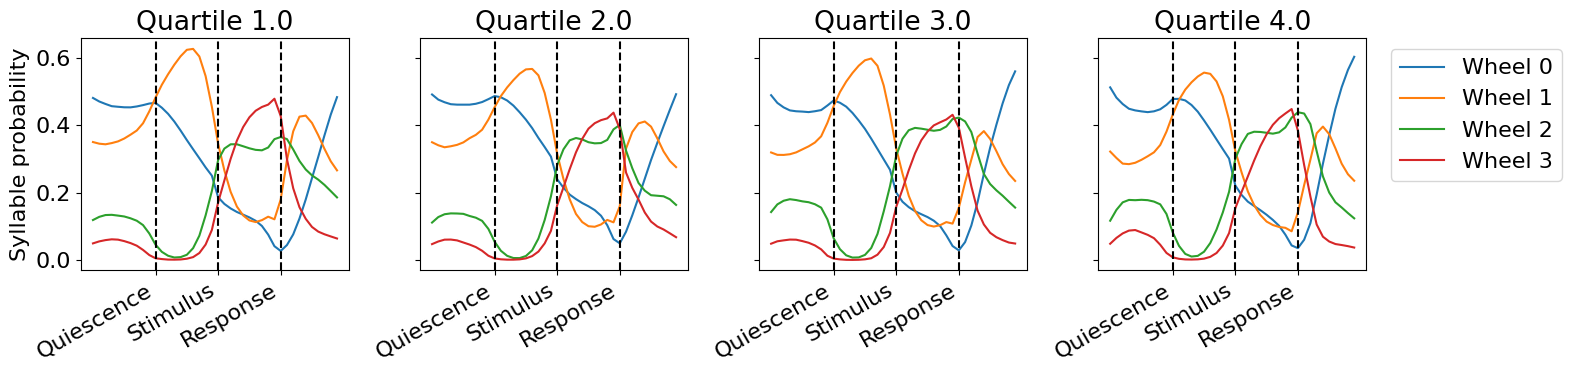

In [52]:
epoch_to_analyse = ['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']

color = sns.color_palette("Set2", 7)
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(16, 4))

for q, quartile in enumerate([1., 2., 3., 4.]):
    cluster_data = use_parts_trials.loc[use_parts_trials['quartile']==quartile]
    sequences_choice = np.vstack(cluster_data[epoch_to_analyse].apply(lambda row: np.hstack(row), axis=1))  # Transpose to get the right shape
    use_sequences = sequences_choice[~np.isnan(sequences_choice).any(axis=1)]
    
    replace_whisker = np.vectorize(whisker_mapping.get)
    whisker_states = replace_whisker(use_sequences)
    replace_wheel = np.vectorize(wheel_mapping.get)
    wheel_states = replace_wheel(use_sequences)    
    replace_lick = np.vectorize(lick_mapping.get)
    lick_states = replace_lick(use_sequences)
    
    whisker_count = np.zeros((1, 40))
    lick_count = np.zeros((1, 40))
    wheel_count = np.zeros((4, 40))

    for b, bin in enumerate(range(40)):
        # counts, bins = np.histogram(use_sequences[:, b], range=(0,15), bins=16)
        whisker_count[0, b] = np.sum(whisker_states[:, b]==1)/len(whisker_states[:, b])
        lick_count[0, b] = np.sum(lick_states[:, b]==1)/len(lick_states[:, b])
        wheel_count[0, b] = np.sum(wheel_states[:, b]==1)/len(wheel_states[:, b])
        wheel_count[1, b] = np.sum(wheel_states[:, b]==2)/len(wheel_states[:, b])
        wheel_count[2, b] = np.sum(wheel_states[:, b]==3)/len(wheel_states[:, b])
        wheel_count[3, b] = np.sum(wheel_states[:, b]==0)/len(wheel_states[:, b])
    
    all_stacked = np.vstack([wheel_count, whisker_count, lick_count])
    # all_stacked = np.vstack([wheel_count])

    # cmap_value_1 = create_shaded_cmap(colors[q], name='cmap_value_1')
    # image = axs[c].imshow(all_stacked, cmap=cmap_value_1, aspect='auto')
    axs[q].plot(all_stacked[0:4, :].T, label=['Wheel 0', 'Wheel 1', 'Wheel 2', 'Wheel 3'])
    # image = axs[q].imshow(all_stacked, cmap='Greys', aspect='auto')
    # fig.colorbar(image, ax=axs[q], location='right', anchor=(0, 0.3))
    # axs[q].set_yticks(np.arange(0, 6, 1), ['Wheel 0', 'Wheel 1', 'Wheel 2', 'Wheel 3', 'Whisking', 'Licking'])
    # axs[c].set_yticks(np.arange(0, 4, 1), ['Wheel 0', 'Wheel 1', 'Wheel 2', 'Wheel 3'])
    axs[q].axvline(x=10, color='k', linestyle='--')
    axs[q].axvline(x=20, color='k', linestyle='--')
    axs[q].axvline(x=30, color='k', linestyle='--')

    axs[q].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    # axs[c].set_xlabel('Time in epoch')
    axs[q].set_title('Quartile ' +str(quartile))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
axs[0].set_ylabel('Syllable probability')
plt.tight_layout()
plt.show()

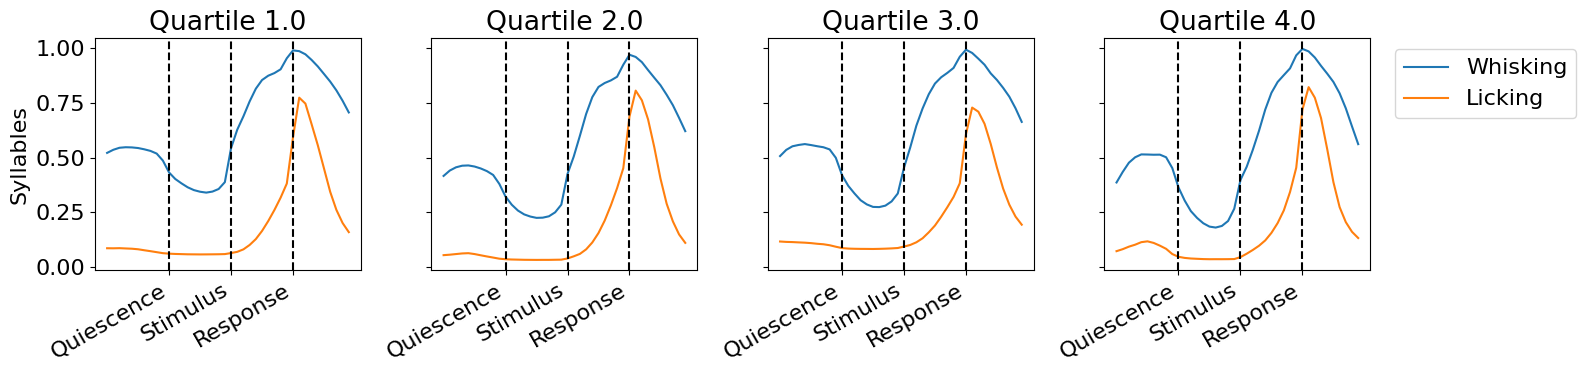

In [53]:
epoch_to_analyse = ['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']

color = sns.color_palette("Set2", 7)
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(16, 4))

for q, quartile in enumerate([1., 2., 3., 4.]):
    cluster_data = use_parts_trials.loc[use_parts_trials['quartile']==quartile]
    sequences_choice = np.vstack(cluster_data[epoch_to_analyse].apply(lambda row: np.hstack(row), axis=1))  # Transpose to get the right shape
    use_sequences = sequences_choice[~np.isnan(sequences_choice).any(axis=1)]
    
    replace_whisker = np.vectorize(whisker_mapping.get)
    whisker_states = replace_whisker(use_sequences)
    replace_wheel = np.vectorize(wheel_mapping.get)
    wheel_states = replace_wheel(use_sequences)    
    replace_lick = np.vectorize(lick_mapping.get)
    lick_states = replace_lick(use_sequences)
    
    whisker_count = np.zeros((1, 40))
    lick_count = np.zeros((1, 40))
    wheel_count = np.zeros((4, 40))

    for b, bin in enumerate(range(40)):
        # counts, bins = np.histogram(use_sequences[:, b], range=(0,15), bins=16)
        whisker_count[0, b] = np.sum(whisker_states[:, b]==1)/len(whisker_states[:, b])
        lick_count[0, b] = np.sum(lick_states[:, b]==1)/len(lick_states[:, b])
        wheel_count[0, b] = np.sum(wheel_states[:, b]==1)/len(wheel_states[:, b])
        wheel_count[1, b] = np.sum(wheel_states[:, b]==2)/len(wheel_states[:, b])
        wheel_count[2, b] = np.sum(wheel_states[:, b]==3)/len(wheel_states[:, b])
        wheel_count[3, b] = np.sum(wheel_states[:, b]==0)/len(wheel_states[:, b])
    
    all_stacked = np.vstack([wheel_count, whisker_count, lick_count])
    # all_stacked = np.vstack([wheel_count])

    # cmap_value_1 = create_shaded_cmap(colors[q], name='cmap_value_1')
    # image = axs[c].imshow(all_stacked, cmap=cmap_value_1, aspect='auto')
    axs[q].plot(all_stacked[4:6, :].T, label=['Whisking', 'Licking'])
    # image = axs[q].imshow(all_stacked, cmap='Greys', aspect='auto')
    # fig.colorbar(image, ax=axs[q], location='right', anchor=(0, 0.3))
    # axs[q].set_yticks(np.arange(0, 6, 1), ['Wheel 0', 'Wheel 1', 'Wheel 2', 'Wheel 3', 'Whisking', 'Licking'])
    # axs[c].set_yticks(np.arange(0, 4, 1), ['Wheel 0', 'Wheel 1', 'Wheel 2', 'Wheel 3'])
    axs[q].axvline(x=10, color='k', linestyle='--')
    axs[q].axvline(x=20, color='k', linestyle='--')
    axs[q].axvline(x=30, color='k', linestyle='--')

    axs[q].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    # axs[c].set_xlabel('Time in epoch')
    axs[q].set_title('Quartile ' +str(quartile))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
axs[0].set_ylabel('Syllables')
plt.tight_layout()
plt.show()